In [168]:
import tweepy

In [169]:
import csv

In [170]:
import numpy as np

In [171]:
from textblob import TextBlob

In [172]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
consumerKey = "gYK4hUwUDdDriL3XbaCcxS732"
consumerSecret = "iqTjfbij6bMbgBL3b48cyox8YOdASpNs8cvZARoVAzSjWUWDmj"
accessToken = "4900371912-DxBfdFBbTkNwQYcU9WX5NVoA1mQlzFRBn5K0ZRi"
accessTokenSecret  = "7KPZcAsbIRLzHLXGlfF22sjmQ4Sh583I0gT7hqYBf6q0d"

In [175]:
authorization = tweepy.OAuthHandler(consumerKey, consumerSecret)
authorization.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authorization)

In [176]:
publicTweets = api.search('Amazon')
print publicTweets[2].text

Deals of the Month - November

Get your deal now at all imCoop outlet!

Don't forget to show your Membership Card... https://t.co/dFaCYIEDlh


In [177]:
## Recognizing tweet sentiments
threshold = 0
positiveTweetSentiment = 0
negativeTweetSentiment = 0
for tweet in publicTweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment.polarity >= threshold:
        positiveTweetSentiment += 1
    else:
        negativeTweetSentiment -= 1
if positiveTweetSentiment > negativeTweetSentiment:
    print "Overall Positive Tweets."
else:
    print "Overall Negative Tweets."

Overall Positive Tweets.


250


<function matplotlib.pyplot.show>

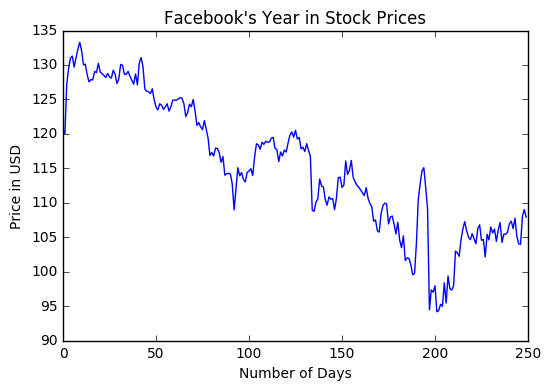

In [178]:
# Collecting Data for Stocks
dates = []
prices = []

def getData(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            # Extracting the dates from the csv file(the 0th element)
            dates.append(int(row[0].split('-')[0]))
            # Extracting the prices from the csv file(the 1st element)
            prices.append(float(row[4]))
    print len(dates)
    return
# amzn.csv is the latest stock data downloaded 
getData('fb.csv')
plt.title('Facebook\'s Year in Stock Prices')
plt.ylabel('Price in USD')
plt.xlabel('Number of Days')
plt.plot(prices)
plt.show

In [179]:
def create_datasets(dates,prices):
    train_size=int(0.85*len(dates))
    TrainX,TrainY=[],[]
    TestX,TestY=[],[]
    cntr1=0
    cntr2 = 0
    for date in dates:
        if cntr1<train_size:
            TrainX.append(date)
            cntr1+=1
        else:
            TestX.append(date)    
    for price in prices:
        if cntr2<train_size:
            TrainY.append(price)
            cntr2+=1
        else:
            TestY.append(price)
#     print "TrainX", TrainX
#     print len(TrainX)
#     print "TrainY", TrainY
#     print len(TrainY)
#     print "TestX", TestX
#     print len(TestX)
#     print "TestY", TestY
#     print len(TestY)
    return TrainX,TrainY,TestX,TestY

create_datasets(dates, prices)

def predict_prices(dates,prices,x):
    TrainX,TrainY,TestX,TestY=create_datasets(dates,prices)

    TrainX=np.reshape(TrainX,(len(TrainX),1))
    TrainY=np.reshape(TrainY,(len(TrainY),1))
    TestX=np.reshape(TestX,(len(TestX),1))
    TestY=np.reshape(TestY,(len(TestY),1))
    
    #for i in range(251):
     #   print TrainX[i],TrainY[i],'\n'
    
    
    model=Sequential()
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(16,init='uniform',activation='relu'))
    
    model.add(Dense(1,init='uniform',activation='relu'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    model.fit(TrainX,TrainY,nb_epoch=100,batch_size=3,verbose=1)

In [185]:
# predictedPrice = predict_prices(dates,prices,5)
# print "Predicted Price", predictedPrice

def predict_prices(dates, prices, x):
    TrainX,TrainY,TestX,TestY=create_datasets(dates,prices)

    TrainX=np.reshape(TrainX,(len(TrainX),1))
#     print TrainX
    TrainY=np.reshape(TrainY,(len(TrainY),1))
#     print TrainY
    TestX=np.reshape(TestX,(len(TestX),1))
#     print TestX
    TestY=np.reshape(TestY,(len(TestY),1))
#     print TestY
    
    model=Sequential()
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(16,init='uniform',activation='relu'))
    
    model.add(Dense(1,init='uniform',activation='relu'))
    model.compile(loss='mse',optimizer='adagrad',metrics=['accuracy'])
    model.fit(TrainX,TrainY,nb_epoch=100,batch_size=3,verbose=1)

predict_prices(dates,prices, 2)

# Epoch 1/100
# 212/212 [==============================] - 0s - loss: 13662.9984 - acc: 0.0000e+00     
# Epoch 2/100
# 212/212 [==============================] - 0s - loss: 10402.7559 - acc: 0.0000e+00     
# Epoch 3/100
# 212/212 [==============================] - 0s - loss: 3243.9950 - acc: 0.0000e+00     
# Epoch 4/100
# 212/212 [==============================] - 0s - loss: 2894.1417 - acc: 0.0000e+00     
# Epoch 5/100
# 212/212 [==============================] - 0s - loss: 2808.7269 - acc: 0.0000e+00     
# Epoch 6/100
# 212/212 [==============================] - 0s - loss: 2728.4644 - acc: 0.0000e+00     
# Epoch 7/100
# 212/212 [==============================] - 0s - loss: 2655.4207 - acc: 0.0000e+00     
# Epoch 8/100
# 212/212 [==============================] - 0s - loss: 2554.4997 - acc: 0.0000e+00     
# Epoch 9/100
# 212/212 [==============================] - 0s - loss: 2523.4347 - acc: 0.0000e+00     
# Epoch 10/100
# 212/212 [==============================] - 0s - loss: 2424.4942 - acc: 0.0000e+00     
# Epoch 11/100
# 212/212 [==============================] - 0s - loss: 2303.8644 - acc: 0.0000e+00     
# Epoch 12/100
# 212/212 [==============================] - 0s - loss: 2212.7391 - acc: 0.0000e+00     
# Epoch 13/100
# 212/212 [==============================] - 0s - loss: 2114.0758 - acc: 0.0000e+00     
# Epoch 14/100
# 212/212 [==============================] - 0s - loss: 1981.3808 - acc: 0.0000e+00     
# Epoch 15/100
# 212/212 [==============================] - 0s - loss: 1844.7266 - acc: 0.0000e+00     
# Epoch 16/100
# 212/212 [==============================] - 0s - loss: 1708.2773 - acc: 0.0000e+00     
# Epoch 17/100
# 212/212 [==============================] - 0s - loss: 1535.4768 - acc: 0.0000e+00     
# Epoch 18/100
# 212/212 [==============================] - 0s - loss: 1339.3658 - acc: 0.0000e+00     
# Epoch 19/100
# 212/212 [==============================] - 0s - loss: 1128.0588 - acc: 0.0000e+00     
# Epoch 20/100
# 212/212 [==============================] - 0s - loss: 901.5935 - acc: 0.0000e+00     
# Epoch 21/100
# 212/212 [==============================] - 0s - loss: 673.9316 - acc: 0.0000e+00     
# Epoch 22/100
# 212/212 [==============================] - 0s - loss: 447.6258 - acc: 0.0000e+00     
# Epoch 23/100
# 212/212 [==============================] - 0s - loss: 283.2601 - acc: 0.0047     
# Epoch 24/100
# 212/212 [==============================] - 0s - loss: 172.8400 - acc: 0.0000e+00     
# Epoch 25/100
# 212/212 [==============================] - 0s - loss: 122.2369 - acc: 0.0000e+00     
# Epoch 26/100
# 212/212 [==============================] - 0s - loss: 107.6778 - acc: 0.0000e+00     
# Epoch 27/100
# 212/212 [==============================] - 0s - loss: 99.0709 - acc: 0.0000e+00     
# Epoch 28/100
# 212/212 [==============================] - 0s - loss: 94.1021 - acc: 0.0000e+00     
# Epoch 29/100
# 212/212 [==============================] - 0s - loss: 95.1208 - acc: 0.0000e+00     
# Epoch 30/100
# 212/212 [==============================] - 0s - loss: 95.1555 - acc: 0.0000e+00     
# Epoch 31/100
# 212/212 [==============================] - 0s - loss: 93.9865 - acc: 0.0000e+00     
# Epoch 32/100
# 212/212 [==============================] - 0s - loss: 94.3466 - acc: 0.0000e+00     
# Epoch 33/100
# 212/212 [==============================] - 0s - loss: 93.3623 - acc: 0.0000e+00     
# Epoch 34/100
# 212/212 [==============================] - 0s - loss: 93.2983 - acc: 0.0000e+00     
# Epoch 35/100
# 212/212 [==============================] - 0s - loss: 94.2557 - acc: 0.0000e+00     
# Epoch 36/100
# 212/212 [==============================] - 0s - loss: 95.5421 - acc: 0.0000e+00     
# Epoch 37/100
# 212/212 [==============================] - 0s - loss: 93.4310 - acc: 0.0047     
# Epoch 38/100
# 212/212 [==============================] - 0s - loss: 92.7638 - acc: 0.0000e+00     
# Epoch 39/100
# 212/212 [==============================] - 0s - loss: 97.8062 - acc: 0.0000e+00     
# Epoch 40/100
# 212/212 [==============================] - 0s - loss: 92.0656 - acc: 0.0000e+00     
# Epoch 41/100
# 212/212 [==============================] - 0s - loss: 96.8755 - acc: 0.0000e+00     
# Epoch 42/100
# 212/212 [==============================] - 0s - loss: 97.6270 - acc: 0.0000e+00     
# Epoch 43/100
# 212/212 [==============================] - 0s - loss: 93.7354 - acc: 0.0047     
# Epoch 44/100
# 212/212 [==============================] - 0s - loss: 95.0749 - acc: 0.0000e+00     
# Epoch 45/100
# 212/212 [==============================] - 0s - loss: 93.3859 - acc: 0.0047     
# Epoch 46/100
# 212/212 [==============================] - 0s - loss: 94.0923 - acc: 0.0000e+00     
# Epoch 47/100
# 212/212 [==============================] - 0s - loss: 94.6800 - acc: 0.0000e+00     
# Epoch 48/100
# 212/212 [==============================] - 0s - loss: 98.2276 - acc: 0.0000e+00     
# Epoch 49/100
# 212/212 [==============================] - 0s - loss: 93.6836 - acc: 0.0000e+00     
# Epoch 50/100
# 212/212 [==============================] - 0s - loss: 94.6774 - acc: 0.0000e+00     
# Epoch 51/100
# 212/212 [==============================] - 0s - loss: 96.7853 - acc: 0.0000e+00     
# Epoch 52/100
# 212/212 [==============================] - 0s - loss: 93.5891 - acc: 0.0000e+00     
# Epoch 53/100
# 212/212 [==============================] - 0s - loss: 94.8792 - acc: 0.0000e+00     
# Epoch 54/100
# 212/212 [==============================] - 0s - loss: 95.3771 - acc: 0.0000e+00     
# Epoch 55/100
# 212/212 [==============================] - 0s - loss: 93.1518 - acc: 0.0000e+00     
# Epoch 56/100
# 212/212 [==============================] - 0s - loss: 92.4797 - acc: 0.0000e+00     
# Epoch 57/100
# 212/212 [==============================] - 0s - loss: 94.7926 - acc: 0.0000e+00     
# Epoch 58/100
# 212/212 [==============================] - 0s - loss: 92.3473 - acc: 0.0000e+00     
# Epoch 59/100
# 212/212 [==============================] - 0s - loss: 91.5490 - acc: 0.0000e+00     
# Epoch 60/100
# 212/212 [==============================] - 0s - loss: 98.1654 - acc: 0.0000e+00     
# Epoch 61/100
# 212/212 [==============================] - 0s - loss: 94.1642 - acc: 0.0000e+00     
# Epoch 62/100
# 212/212 [==============================] - 0s - loss: 94.5308 - acc: 0.0047     
# Epoch 63/100
# 212/212 [==============================] - 0s - loss: 91.1894 - acc: 0.0000e+00     
# Epoch 64/100
# 212/212 [==============================] - 0s - loss: 97.8369 - acc: 0.0000e+00     
# Epoch 65/100
# 212/212 [==============================] - 0s - loss: 99.5267 - acc: 0.0000e+00     
# Epoch 66/100
# 212/212 [==============================] - 0s - loss: 94.6285 - acc: 0.0000e+00     
# Epoch 67/100
# 212/212 [==============================] - 0s - loss: 100.7964 - acc: 0.0000e+00     
# Epoch 68/100
# 212/212 [==============================] - 0s - loss: 100.1596 - acc: 0.0000e+00     
# Epoch 69/100
# 212/212 [==============================] - 0s - loss: 93.7865 - acc: 0.0000e+00     
# Epoch 70/100
# 212/212 [==============================] - 0s - loss: 97.9591 - acc: 0.0047     
# Epoch 71/100
# 212/212 [==============================] - 0s - loss: 95.2623 - acc: 0.0000e+00     
# Epoch 72/100
# 212/212 [==============================] - 0s - loss: 92.2269 - acc: 0.0000e+00     
# Epoch 73/100
# 212/212 [==============================] - 0s - loss: 93.9878 - acc: 0.0000e+00     
# Epoch 74/100
# 212/212 [==============================] - 0s - loss: 93.0388 - acc: 0.0000e+00     
# Epoch 75/100
# 212/212 [==============================] - 0s - loss: 99.2143 - acc: 0.0000e+00      
# Epoch 76/100
# 212/212 [==============================] - 0s - loss: 96.2092 - acc: 0.0000e+00     
# Epoch 77/100
# 212/212 [==============================] - 0s - loss: 98.6371 - acc: 0.0047     
# Epoch 78/100
# 212/212 [==============================] - 0s - loss: 93.3457 - acc: 0.0000e+00     
# Epoch 79/100
# 212/212 [==============================] - 0s - loss: 98.4776 - acc: 0.0000e+00     
# Epoch 80/100
# 212/212 [==============================] - 0s - loss: 95.2939 - acc: 0.0000e+00     
# Epoch 81/100
# 212/212 [==============================] - 0s - loss: 94.2162 - acc: 0.0000e+00     
# Epoch 82/100
# 212/212 [==============================] - 0s - loss: 101.1742 - acc: 0.0047     
# Epoch 83/100
# 212/212 [==============================] - 0s - loss: 94.5343 - acc: 0.0000e+00     
# Epoch 84/100
# 212/212 [==============================] - 0s - loss: 94.3580 - acc: 0.0000e+00     
# Epoch 85/100
# 212/212 [==============================] - 0s - loss: 98.9560 - acc: 0.0000e+00      
# Epoch 86/100
# 212/212 [==============================] - 0s - loss: 97.6485 - acc: 0.0000e+00     
# Epoch 87/100
# 212/212 [==============================] - 0s - loss: 94.5293 - acc: 0.0000e+00     
# Epoch 88/100
# 212/212 [==============================] - 0s - loss: 93.2377 - acc: 0.0000e+00     
# Epoch 89/100
# 212/212 [==============================] - 0s - loss: 96.5086 - acc: 0.0000e+00     
# Epoch 90/100
# 212/212 [==============================] - 0s - loss: 102.7206 - acc: 0.0000e+00     
# Epoch 91/100
# 212/212 [==============================] - 0s - loss: 95.5876 - acc: 0.0000e+00     
# Epoch 92/100
# 212/212 [==============================] - 0s - loss: 96.3342 - acc: 0.0000e+00     
# Epoch 93/100
# 212/212 [==============================] - 0s - loss: 98.3962 - acc: 0.0000e+00     
# Epoch 94/100
# 212/212 [==============================] - 0s - loss: 94.6247 - acc: 0.0000e+00     
# Epoch 95/100
# 212/212 [==============================] - 0s - loss: 98.4969 - acc: 0.0000e+00     
# Epoch 96/100
# 212/212 [==============================] - 0s - loss: 93.7995 - acc: 0.0000e+00     
# Epoch 97/100
# 212/212 [==============================] - 0s - loss: 92.5840 - acc: 0.0000e+00     
# Epoch 98/100
# 212/212 [==============================] - 0s - loss: 92.9629 - acc: 0.0000e+00     
# Epoch 99/100
# 212/212 [==============================] - 0s - loss: 97.3458 - acc: 0.0000e+00     
# Epoch 100/100
# 212/212 [==============================] - 0s - loss: 96.5183 - acc: 0.0000e+00   

Epoch 1/100
212/212 [==============================] - 0s - loss: 9437.4986 - acc: 0.0000e+00     
Epoch 2/100
212/212 [==============================] - 0s - loss: 3037.3436 - acc: 0.0000e+00     
Epoch 3/100
212/212 [==============================] - 0s - loss: 2914.1171 - acc: 0.0000e+00     
Epoch 4/100
212/212 [==============================] - 0s - loss: 2863.3379 - acc: 0.0000e+00     
Epoch 5/100
212/212 [==============================] - 0s - loss: 2824.2838 - acc: 0.0000e+00     
Epoch 6/100
212/212 [==============================] - 0s - loss: 2785.4036 - acc: 0.0000e+00     
Epoch 7/100
212/212 [==============================] - 0s - loss: 2745.4916 - acc: 0.0000e+00     
Epoch 8/100
212/212 [==============================] - 0s - loss: 2724.3466 - acc: 0.0000e+00     
Epoch 9/100
212/212 [==============================] - 0s - loss: 2687.8698 - acc: 0.0000e+00     
Epoch 10/100
212/212 [==============================] - 0s - loss: 2655.2988 - acc: 0.0000e+00     
Epoch 11/